<a href="https://colab.research.google.com/github/Eedpugantirajasri/Customer-Segmentation/blob/main/Customer_Segmentation_Using_AIML_(K_Means_Clustering)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Display first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Rename for simplicity
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

# Selecting relevant features
X = df[['Income', 'SpendingScore']]

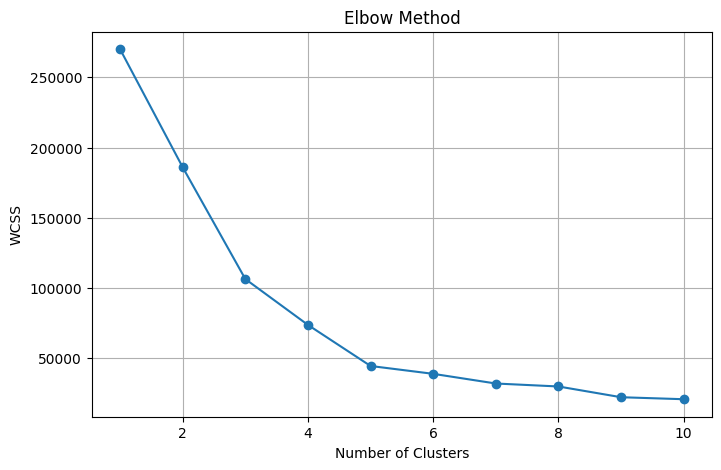

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [ ]:
# Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

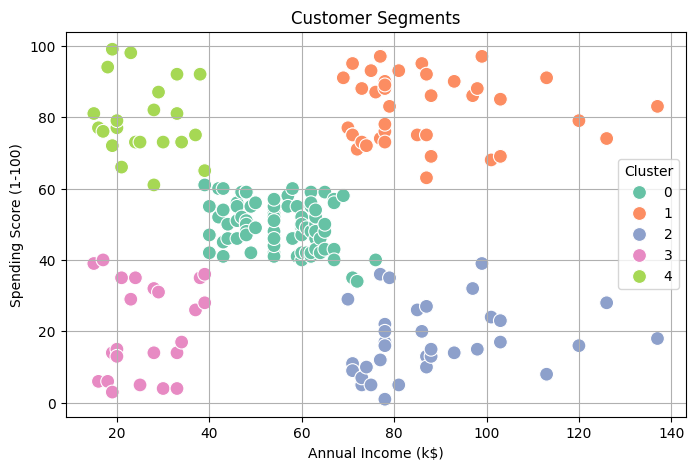

In [ ]:
# Cluster plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

In [ ]:
# Group by clusters
cluster_profiles = df.groupby('Cluster')[['Income', 'SpendingScore']].mean()
print(cluster_profiles)

            Income  SpendingScore
Cluster                          
0        55.296296      49.518519
1        86.538462      82.128205
2        88.200000      17.114286
3        26.304348      20.913043
4        25.727273      79.363636
